# Assignment 6: Apply NB

In [40]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os


## 1.1 Loading Data

In [41]:
import pandas as pd
data  = pd.read_csv('preprocessed_data.csv', nrows=50000)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [42]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [43]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,3), max_features=7000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
#print(X_train['essay'].head(5),X_train.shape)
l=[]
l.extend(vectorizer.get_feature_names())
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)
#print(X_train_essay_bow.shape)
tfl=[]
vectorizer = TfidfVectorizer(min_df=10,max_features=7000)
vectorizer.fit(X_train['essay'].values)# fit has to happen only on train data
tfl.extend(vectorizer.get_feature_names())

X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)






In [44]:
print(X_train.columns)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [45]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data
l.extend(vectorizer.get_feature_names())
tfl.extend(vectorizer.get_feature_names())


# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data
l.extend(vectorizer.get_feature_names())
tfl.extend(vectorizer.get_feature_names())

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
l.extend(vectorizer.get_feature_names())
tfl.extend(vectorizer.get_feature_names())


vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data
l.extend(vectorizer.get_feature_names())



# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)


vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data
l.extend(vectorizer.get_feature_names())
tfl.extend(vectorizer.get_feature_names())





# we use the fitted CountVectorizer to convert the text to vector
X_train_cleancat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cleancat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cleancat_ohe = vectorizer.transform(X_test['clean_categories'].values)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data
l.extend(vectorizer.get_feature_names())
tfl.extend(vectorizer.get_feature_names())


# we use the fitted CountVectorizer to convert the text to vector
X_train_cleansubcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_cleansubcat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_cleansubcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)





In [46]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
l.append('price')
tfl.append('price')


X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).T
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1)).T
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).T

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
l.append('teacher_number_of_previously_posted_projects')
tfl.append('teacher_number_of_previously_posted_projects')


X_train_tn_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
X_cv_tn_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
X_test_tn_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T



In [36]:
from scipy.sparse import hstack
from scipy.sparse import vstack

X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_cleancat_ohe,X_train_cleansubcat_ohe,X_train_tn_norm)).tocsr()
X_cv = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_cleancat_ohe,X_cv_cleansubcat_ohe,X_cv_tn_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_cleancat_ohe,X_test_cleansubcat_ohe,X_test_tn_norm)).tocsr()
print(y_train.shape,y_cv.shape)
X_tr=vstack((X_tr,X_cv))
y_train=np.concatenate((y_train,y_cv))
print(y_train.shape,X_tr.shape)
print(len(l))

(22445,) (11055,)
(33500,) (33500, 7101)
7106


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

{'alpha': 1e-05}


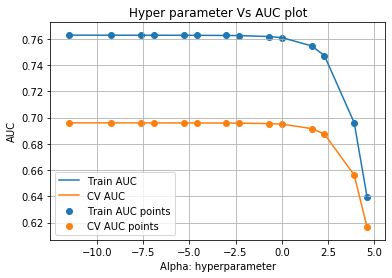

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.122890,0.012319,0.019580,0.002492,1e-05,{'alpha': 1e-05},0.695306,0.708164,0.691951,0.699427,...,0.696018,0.007645,1,0.761834,0.761565,0.761534,0.763395,0.765957,0.762857,0.001695
2,0.117702,0.000622,0.017149,0.000741,0.0001,{'alpha': 0.0001},0.695295,0.708112,0.691977,0.699397,...,0.696002,0.007628,2,0.761807,0.761546,0.761506,0.763366,0.765932,0.762832,0.001695
1,0.120566,0.001661,0.018283,0.002824,0.0005,{'alpha': 0.0005},0.695283,0.708071,0.691995,0.699353,...,0.695983,0.007614,3,0.761780,0.761528,0.761479,0.763338,0.765909,0.762807,0.001695
4,0.118918,0.001912,0.016761,0.000403,0.001,{'alpha': 0.001},0.695280,0.708051,0.691996,0.699329,...,0.695972,0.007607,4,0.761768,0.761518,0.761465,0.763323,0.765896,0.762794,0.001694
3,0.103294,0.017413,0.014583,0.002230,0.005,{'alpha': 0.005},0.695260,0.707996,0.691993,0.699266,...,0.695940,0.007591,5,0.761726,0.761485,0.761422,0.763278,0.765857,0.762754,0.001694


In [37]:
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
neigh = MultinomialNB( class_prior = [0.5, 0.5] )
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)



results = pd.DataFrame.from_dict(clf.cv_results_)
print(clf.best_params_)
best_alpha=(clf.best_params_['alpha'])
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']
log_alpha=np.log(list(alpha))
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()



(33500, 7101) (33500,)


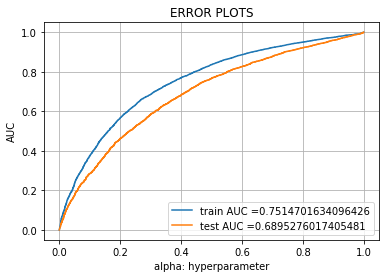

IMPORTANT FEATURES:
students
school
learning
my
classroom
not
learn
help
they
the
my students
nannan
many
we
need
work
come
year
able
love


In [38]:
from sklearn.metrics import roc_curve, auc


nb = MultinomialNB(alpha=best_alpha,class_prior=[0.5,0.5])
print(X_tr.shape,y_train.shape)
nb.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = nb.predict_log_proba(X_tr)[:, 1]    
y_test_pred = nb.predict_log_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()




class0_prob=nb.feature_log_prob_[0]
class1_prob=nb.feature_log_prob_[1]
class0_index=np.argsort(class0_prob)[::-1]
class1_index=np.argsort(class1_prob)[::-1]
print("IMPORTANT FEATURES:")
for i in range(0,20):
    j=class0_index[i]
    print(l[j])


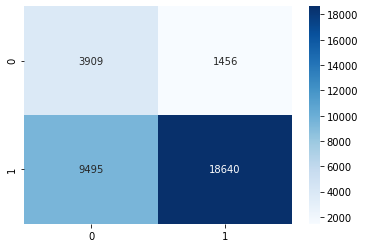

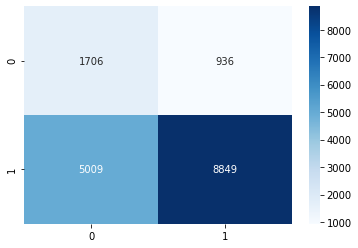

In [39]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    return t

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_cmatrix=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
test_cmatrix=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

import seaborn as sns
import matplotlib.pyplot as plt     

sns.heatmap(train_cmatrix, annot=True,fmt="d",cmap='Blues')
plt.figure(2)
sns.heatmap(test_cmatrix, annot=True,fmt="d",cmap='Blues')


In [47]:
from scipy.sparse import hstack
from scipy.sparse import vstack

X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_cleancat_ohe,X_train_cleansubcat_ohe,X_train_tn_norm)).tocsr()
X_cv = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_cleancat_ohe,X_cv_cleansubcat_ohe,X_cv_tn_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_cleancat_ohe,X_test_cleansubcat_ohe,X_test_tn_norm)).tocsr()
print(y_train.shape,y_cv.shape)
X_tr=vstack((X_tr,X_cv))
y_train=np.concatenate((y_train,y_cv))
print(y_train.shape,X_tr.shape)
print(len(l))

(22445,) (11055,)
(33500,) (33500, 7101)
7106


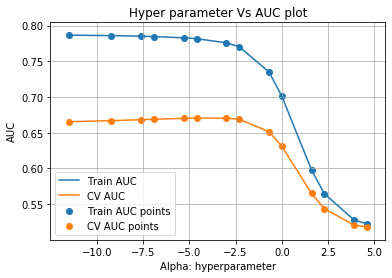

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.101994,0.003020,0.014425,0.000826,1e-05,{'alpha': 1e-05},0.674214,0.666026,0.655600,0.661371,...,0.005980,8,0.784372,0.787368,0.787119,0.790248,0.784664,0.786325,0.786683,0.001954
2,0.126060,0.027255,0.015239,0.004130,0.0001,{'alpha': 0.0001},0.675936,0.667249,0.657079,0.663507,...,0.005903,7,0.783727,0.786670,0.786359,0.789618,0.784052,0.785704,0.786022,0.001946
1,0.103588,0.005027,0.014030,0.002371,0.0005,{'alpha': 0.0005},0.677485,0.668370,0.658325,0.665134,...,0.005903,6,0.782922,0.785811,0.785486,0.788830,0.783273,0.784959,0.785214,0.001940
4,0.134090,0.044297,0.017094,0.006555,0.001,{'alpha': 0.001},0.678218,0.668879,0.658886,0.665767,...,0.005929,5,0.782431,0.785291,0.784964,0.788351,0.782792,0.784507,0.784723,0.001940
3,0.102060,0.005718,0.015817,0.001196,0.005,{'alpha': 0.005},0.679825,0.670163,0.660010,0.667286,...,0.006013,3,0.780671,0.783451,0.783148,0.786605,0.781063,0.782895,0.782972,0.001932


In [48]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
neigh = MultinomialNB( class_prior = [0.5, 0.5] )
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(neigh, parameters, cv=6, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']
log_alpha=np.log(list(alpha))
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()



0.01


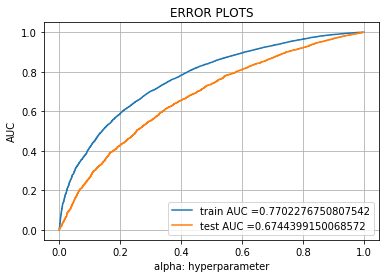

IMPORTANT FEATURES:
mrs
literacy_language
ms
math_science
ms
dr
literacy
mathematics
literature_writing
mr
health_sports
ca
students
specialneeds
specialneeds
appliedlearning
health_wellness
appliedsciences
mr
tx


In [49]:
best_alpha=clf.best_params_['alpha']
print(best_alpha)
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV



nb = MultinomialNB(alpha=best_alpha,class_prior=[0.5,0.5])
nb.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
nb_clf = CalibratedClassifierCV(nb, method="sigmoid")
nb_clf.fit(X_tr, y_train)



y_train_pred = nb_clf.predict_proba(X_tr)[:,1]    
y_test_pred = nb_clf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



class0_prob=nb.feature_log_prob_[0]
class1_prob=nb.feature_log_prob_[1]
class0_index=np.argsort(class0_prob)[::-1]
class1_index=np.argsort(class1_prob)[::-1]
print("IMPORTANT FEATURES:")
for i in range(0,20):
    j=class0_index[i]
    print(tfl[j])


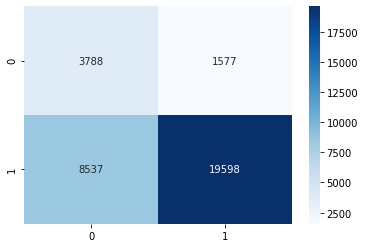

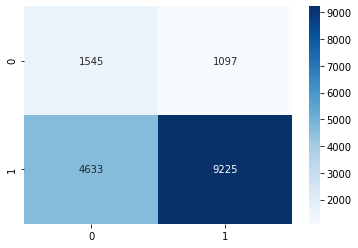

In [50]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    return t

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_cmatrix=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
test_cmatrix=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

import seaborn as sns
import matplotlib.pyplot as plt     

sns.heatmap(train_cmatrix, annot=True,fmt="d",cmap='Blues')
plt.figure(2)
sns.heatmap(test_cmatrix, annot=True,fmt="d",cmap='Blues')


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

<table style="width:100%">
  <tr>
    <th>Vectorizer</th>
    <th>Model</th>
    <th>Hyperparameter</th>
    <th>AUC</th>

  </tr>
  <tr>
    <td>BOW</td>
    <td>NAIVE BAYES</td>
    <td>1e-05</td>
    <td>0.689</td>

  </tr>
  <tr>
    <td>TF-IDF</td>
    <td>NAIVE BAYES</td>
    <td>0.01</td>
     <td>0.674</td>

  </tr>
</table>
